# Reguläre Ausdrücke / RegEx

In diesem Notebook lernen wir sog. *Reguläre Ausdrücke* (engl.: *regular expressions*, abgekürzt: *RegEx*) kennen. RegEx bezeichnet eine sehr leistungsfähige Suchsprache, die es uns erlaubt, komplexe, abstrakte Muster zum Suchen zu verwenden, anstatt bloß literaler (wörtlicher) Suchbegriffe (z.B. ein bestimmtes Wort, nach welchem wir einen Text durchsuchen). Um das zu veranschaulichen und gleichzeitig den immensen Nutzen von RegEx herauszuarbeiten, nähern wir uns dem Thema über zwei Beispiele von konkreten Anwendungen.

## Beispiel 1: Inputvalidierung

Beim Ausfüllen von Formularen auf einer Webseite, z.B. beim Bestellen in einem Onlineshop, wurdest Du sicherlich schon mal darauf hingewiesen, dass eine Deiner Angaben nicht korrekt ist. Wie hier bei der Eingabe einer Lieferadresse:

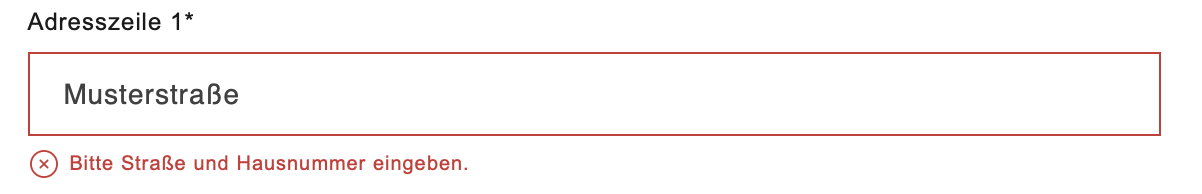

Wieso kommt der Onlineshop zum Schluss, dass diese Eingabe fehlerhaft ist? Hier findet keine Abfrage in einer Datenbank mit allen existierenden Adressen in Deutschland (oder sonst wo) statt, das wäre zu umständlich. Diese sog. *Inputvalidierung* verläuft viel simpler: Im Hintergrund wurde ein mehr oder minder abstrakter, regulärer Ausdruck definiert, der beschreibt, wie der Input, hier die Adresse, auszusehen hat. 

Dieser reguläre Ausdruck scheint nicht nur eine Straße (vermutlich operationalisiert als Abfolge alphabetischer Zeichen, ggf. mit Leerzeichen für Fälle wie "Dresdner Straße"), sondern ebenfalls eine Zahl für die Hausnummer zu verlangen. Bei jeder neuen Eingabe ver*sucht* das System, den regulären Ausdruck wie eine Schablone über den Input zu legen. Lässt er sich darüber legen, so haben wir einen sog. *match*. Das bedeutet, dass die Eingabe dem regulären Ausdruck entspricht bzw. im Beispiel hier, dass die Eingabe korrekt ist. Andernfalls "spuckt" das System eine Fehlermeldung wie oben "aus". 

## Beispiel 2: Musterbasierte Suche

Neben der Inputvalidierung sind reguläre Ausdrücke äußerst hilfreich, um bestimmte Elemente in einer großen Datenmenge aufzuspüren. Damit sind nicht *identische* Elemente gemeint, denn da würde ja eine literale Suche ausreichen. Gemeint sind Elemente, die zwar nicht identisch sind, wohl aber insgesamt einem einheitlichen *Muster* entsprechen. Ein bestimmter regulärer Ausdruck wird daher auch oft *Muster* bzw. *pattern* auf Englisch genannt. 

In folgendem Ausschnitt des Quelltexts der [Homepage der TU Dresden](https://tu-dresden.de) verbergen sich fünf Links auf andere Webseiten, die zwar allesamt identisch beginnen, aber nicht identisch enden (sonst wäre es ja fünf mal derselbe Link).

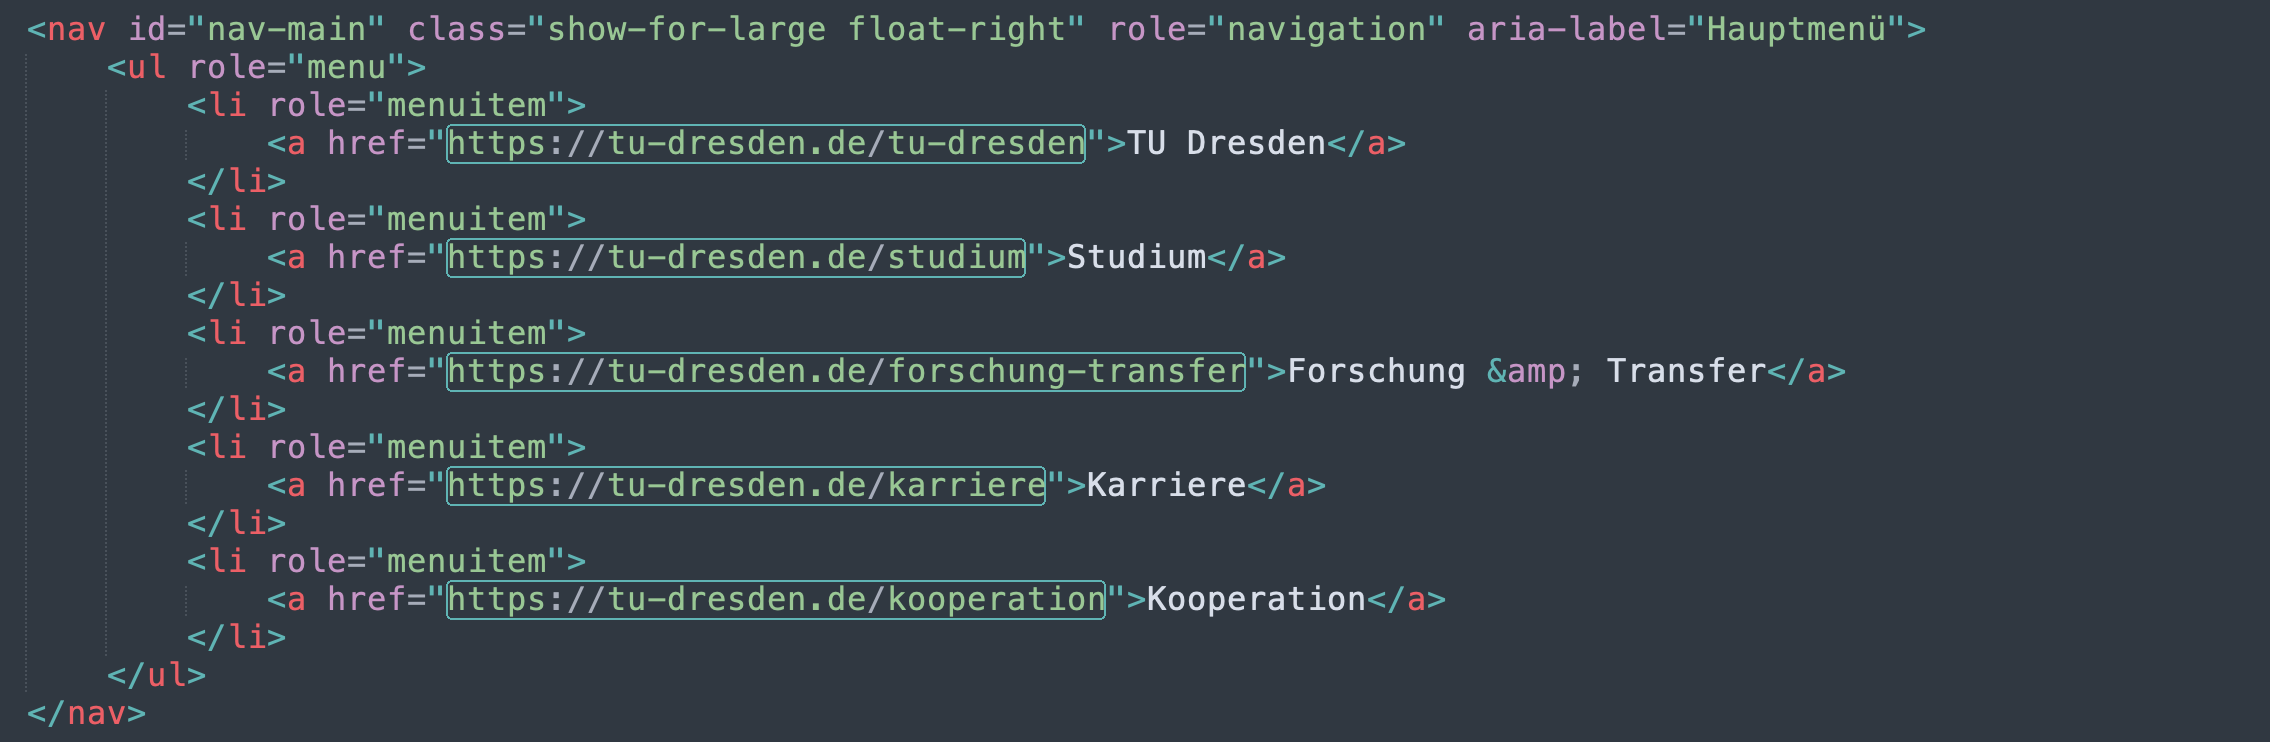

Nun wollen wir alle Links aus dem Quelltext extrahieren, z.B. um auch den Quelltext der verlinkten Seiten automatisiert herunterzuladen (diese Technik nennt sich wie im ersten Notebook erwähnt *Web Scraping*, ein Aufbaumodul wird sich ihr ausführlich widmen). Dazu können wir den HTML-Code nach folgendem regulären Ausdruck absuchen:

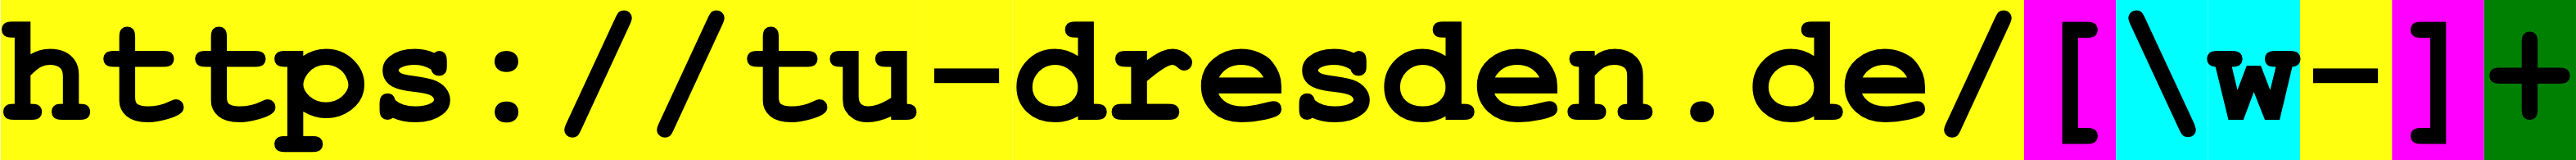

Dieser reguläre Ausdruck verlangt, dass ein Link mit der literalen Zeichenfolge "https://tu-dresden.de/" beginnt (gelb markiert). Nun folgen ein paar auf den ersten Blick kryptische Zeichen, die regulären Ausdrücken jedoch ihre Leistungsfähigkeit verleihen, indem sie statt ihrer literalen Bedeutung eine Sonderbedeutung haben. Wir gehen unten detailiert auf diese Sonderzeichen ein. Hier ein kurzer Vorausblick: Die Zeichen definieren, dass im Anschluss an die literale Zeichenfolge beliebig viele, aber mindestens ein Zeichen (für diese Bedingung sorgt der Quantifikator ```+``` (grün)) der von den eckigen Klammern (pink) umrahmten Zeichen- bzw. Zeichenklassen folgen dürfen. Diese Zeichen können entweder alphanumerische Zeichen sein (konkret: große/kleine Buchstaben, Zahlen sowie der Unterstrich). Für diese Gruppe von erlaubten Zeichen steht ```\w``` (blau). Alternativ darf auch ein Bindestrich (gelb) vorkommen. Dieser steht literal im Suchbegriff, da er für sich selbst steht und keine Sonderbedeutung hat. 

Im Screenshot oben wurde der Quelltext nach diesem regulären Ausdruck durchsucht. Die Ergebnisse sind mit einem dünnen Strich umrahmt. Die Anführungszeichen nach den Links werden jeweils nicht mehr *gematcht*, da sie nicht zu den innerhalb der eckigen Klammern definierten Zeichen- bzw. Zeichenklassen gehören. 

Unser regulärer Ausdruck funktioniert für die fünf gegebenen Links. Bei längeren Links, die auf "tiefere" Unterseiten verlinken (mit weiteren "/" konkateniert), müsste er aber verfeinert werden. Natürlich ließe er sich auch derart modifizieren, dass optional auch nicht-verschlüsselte Links (also ohne "s" nach "http") oder solche mit "www" zwischen "https://" und Domain (hier: "tu-dresden") gematcht werden. Wie das geht, lernen wir weiter unten.

Wir fassen zusammen: Sowohl bei der Inputvalidierung als auch bei der musterbasierten Suche ist das Prinzip von RegEx das Gleiche: 

**Wir formulieren *einen* regulären Ausdruck auf eine ausreichend abstrakte Weise, sodass er alle gewünschten Fälle auf einmal abdeckt.** 

Genau wie bei bedingten Anweisungen müssen wir gleichzeitig darauf achten, dass wir nicht "über das Ziel hinausschießen" und das Muster *zu* abstrakt formulieren und dadurch womöglich unerwünschte Fälle matchen (vgl. auch Wahrheitsmatrix im letzten Notebook).

Auch in diesem Notebook gibt es einen Anwendungsfall.

***

##  🔧 Anwendungsfall: Der Pizzabot 🍕🤖

Beim Pizzabot in der nächsten Zelle kannst Du Dir eine Pizza bestellen. Der Bot ist leider noch ein wenig unflexibel und akzeptiert nur sehr spezifischen Input. Wenn er Dich nicht versteht, gibt er Dir aber Hinweise dazu, was er verarbeiten kann. Bestell gleich ein paar Pizzen, indem Du die nächste Zelle mehrmals hintereinander ausführst und Dich so mit ihm vertraut machst. Eventuell musst Du jeweils erst ins Antwortfeld unter der Frage klicken, sodass der Cursor blinkt.

In [ ]:
"""diese beiden Zeilen kannst Du ignorieren (sie sind nötig, da sich das zu importierende Modul 
in einem anderen Verzeichnis als das Notebook befindet (vgl. viertes Notebook)"""
import sys
sys.path.append("../3_Dateien/Module")

import pizzabot

#hier aktivieren wir den Pizzabot
pizzabot.order_pizza()

Wie Du siehst, funktioniert der Pizzabot prinzipiell ganz gut. Der Code dafür, der sich bereits fertig in den Modulen ```pizzabot``` und ```pizza_functions``` im Ordner "3_Dateien/Module" befindet, tut also seinen Dienst. Einzig störend ist die Tatsache, dass Benutzer:innen genau wissen müssen, welchen Input der Bot verarbeiten kann. Das ist nicht sehr kund:innenfreundlich. 

Der Anwendungsfall in diesem Notebook besteht aus zwei Teilaufgaben: Bei der RegEx-bezogenen Aufgabe, wirst Du Deine in diesem Notebook erlernten Kenntnisse zu regulären Ausdrücken einsetzen. Bei der Dokumentationsaufgabe geht es darum, Code, den jemand anderes geschrieben hat, zu verstehen und zu dokumentieren.

### RegEx-bezogene Aufgabe

Die RegEx-bezogene Aufgabe besteht darin, den Pizzabot flexibler in Bezug auf Input zu machen. Dafür wirst Du die regulären Ausdrücke erweitern müssen, die schon jetzt im Code dafür benutzt werden, den User-Input zu validieren. 

Beispielsweise wird die Antwort auf Ja-Nein-Fragen momentan nur nach den strings "Ja" und "Nein" abgesucht. Durch Deine regulären Ausdrücke sollen Kund:innen in Zukunft ohne Probleme auch mit "ja", "nö", "Ne", "NEIN" etc. antworten können. Ebenfalls soll der Pizzabot mit Rechtschreibfehlern bei den Pizzanamen umgehen können (etwa "Margharita"), um Kund:innen nicht unnötig vor den Kopf zu stoßen. Letztlich besteht ein großes Manko des Pizzabots noch darin, dass er nur an eine einzige Adresse liefern kann, nämlich an die what3words-Adresse "falschen.fliegen.beliebten", was übrigens der [nordöstlichen Ecke der Zentralbibliothek der TU Dresden (SLUB)](https://w3w.co/falschen.fliegen.beliebten) entspricht. Das musst Du ändern, sodass der Pizzabot in Zukunft weltweit liefern kann, und zwar an jedes beliebige 3 x 3 m große Quadrat auf der Erdoberfläche. what3words hat nämlich jedes dieser Quadrate mit einer Adresse bestehend aus drei Wörtern analog zu "falschen.fliegen.beliebten" versehen. Solche Adressen erlauben einerseits eine viel genauere Angabe als konventionelle Straßennamen (z.B. auch Orte in einem Park oder am Strand) und sind andererseits viel "menschenfreundlicher" als Koordinaten. Genauere Instruktionen, wie Du die regulären Ausdrücke erweitern sollst, findest Du weiter unten.

### Dokumentationsaufgabe

Die Dokumentationsaufgabe besteht darin, dass Du Dir den Code, der ja schon fertig ist, genau anschaust und ihn mithilfe von Kommentaren dokumentierst. Auch wenn Du hier nicht selbst programmieren musst, ist Dein Verständnis von Python sehr gefragt. Das Nachvollziehen von Code, den jemand anderes geschrieben hat, ist zuweilen eine mühselige Aufgabe, weil wir alle unseren eigenen Programmierstil pflegen. Gleichzeitig lernen wir dadurch andere, vielleicht effizientere Herangehensweisen und erweitern so unser Programmierrepertoire. Auch hierzu findest Du nähere Instruktionen weiter unten.

***

## Die Suchsprache im Detail

Reguläre Ausdrücke basieren auf einer Suchsprache, die literale Zeichen mit Sonderzeichen kombiniert. Genau diese Sonderzeichen verleihen der Suchsprache ihre große Leistungsfähigkeit. Wir werden die wichtigsten unter ihnen im Folgenden kennenlernen und anwenden. 

Zunächst: Reguläre Ausdrücke sind keine Erfindung von Python. Die Suchsprache ist in diversen Programmiersprachen implementiert, ebenso wie in vielen Texteditoren wie z.B. Sublime Text (vgl. viertes Notebook) und in einer abgewandelten Version auch in Microsoft Word. Was Du hier lernst, wirst Du also auch außerhalb Pythons anwenden können. Innerhalb Pythons sind reguläre Ausdrücke im ```re```-Modul der Standardbibliothek implementiert. Dieses importierst Du, indem Du die nächste Zelle ausführst:

In [ ]:
import re

Dem Modul und seinen Funktionen und Methoden ist weiter unten ein eigener Abschnitt gewidmet. Wir werden es im Folgenden aber bereits einsetzen, um erlernte Sonderzeichen gleich auszuprobieren. Konzentriere Dich vorerst nur auf die regulären Ausdrücke, die wir jeweils mit der Variable ```regex``` referenzieren. Die Syntax von ```re```-Funktionen/Methoden, denen wir ```regex``` übergeben, kannst Du bis auf Weiteres ignorieren.

### Literale Zeichen

Wie gesagt, reguläre Ausdrücke kombinieren literale Zeichen mit Sonderzeichen. Zu den literalen Zeichen gibt es nicht mehr zu sagen, als dass sie schlicht sich selbst bedeuten. Das gilt etwa für alle Buchstaben und Zahlen, wobei bei Buchstaben wie immer Groß- und Kleinschreibung eine Rolle spielt. 

Steht etwa ein "h" in einem regulären Ausdruck, wie oben bei der Link-RegEx, so hat dieses "h" keine Sonderbedeutung, sondern steht nur für sich selbst und matcht folglich *einmal* den kleinen Buchstaben "h". Die Betonung liegt auf *einmal*, denn alle Zeichen in einem regulären Ausdruck (auch Sonderzeichen) matchen standardmäßig *ein* einziges Zeichen. Ein (fehlerhafter) Link, der mit "hhttps://..." beginnt, wäre oben folglich nicht gematcht worden. Dieses Verhalten kann natürlich angepasst werden, dazu gleich mehr unter "Quantifikatoren".

Nun zum eigentlich Spannenden an der Suchsprache:

### Sonderzeichen

Das simpelste aller Sonderzeichen ist die sog. Wildcard. 

#### Wildcard

Der ```.``` matcht ganz einfach ein beliebiges Zeichen, wie in der folgenden Tabelle ersichtlich. Solche Tabellen mit einer konzisen Zusammenfassung der Sonderzeichen gibt es zu allen Sonderzeichen und eine Zusammenstellung aller Tabellen findet sich am Ende dieses Notebooks.

| **Zeichen** | **Sonderbedeutung** | **Beispiel** | **Bemerkungen** 
|:-:|:-|:-|:-:|
| ```.``` | matcht ein beliebiges Zeichen | ```H.nd``` matcht z.B. *Hund*, *Hand* | einzige Ausnahme: `.` matcht keinen Zeilenumbruch

Auch die Wildcard matcht standardmäßig *ein* einziges Zeichen. Der reguläre Ausdruck ```H.nd``` matcht also z.B. nicht "H*olla*nd".

#### Quantifikatoren

Mithilfe von Quantifikatoren können wir dieses Verhalten anpassen. Quantifikatoren stehen jeweils nach dem Zeichen, bei welchem wir (abweichend vom standardmäßig einmaligen Auftreten) definieren möchten, wie oft es vorkommen darf bzw. muss, damit ein Match vorliegt. Dazu können wir einerseits die Sonderzeichen ```*```, ```+``` und ```?``` für die gängigsten quantitativen Bedingungen verwenden. Andererseits können wir mithilfe geschweifter Klammern auch eigene quantitative Bedingungen aufstellen. In folgenden Beispielen kommt neben den Quantifikatoren auch die bereits eingeführte Wildcard `.` vor:

| **Zeichen** | **Sonderbedeutung** | **Beispiel** | **Bemerkungen** 
|:-:|:-|:-|:-|
| ```*``` | das davor stehende Zeichen darf 0 bis *n* mal vorkommen | ```Hund.*``` matcht z.B. *Hund*, *Hunde*, *Hundehütte* | –
| ```+``` | das davor stehende Zeichen darf 1 bis *n* mal vorkommen | ```Hund.+``` matcht z.B. *Hunde*, *Hundehütte* | –
| ```?``` | das davor stehende Zeichen darf 0 bis 1 mal vorkommen | ```Hund.?``` matcht z.B. *Hund*, *Hunde*, *Hunds* | –
| ```{n}``` | das davor stehende Zeichen darf genau *n* mal vorkommen | ```Hu{7}nd``` matcht *Huuuuuuund* | –
| ```{n,m}``` | das davor stehende Zeichen darf min. *n* und max. *m* mal vorkommen | ```Hu{2,3}nd``` matcht *Huund*, *Huuund* | bleiben *n* / *m* leer, werden nach unten / oben beliebig viele Zeichen gematcht

***

✏️ **Übung 1:** Finde heraus, wieviele Mal drei aufeinanderfolgende "f" im string ```text``` vorkommen. ```regex``` soll Deinen regulären Ausdruck referenzieren. Es handelt sich dabei ebenfalls um einen string, allerdings mit einem dem öffnenden Anführungszeichen vorangestellten "r"/"R". Wie bei f-strings im fünften Notebook teilen wir Python damit mit, dass der folgende string anders als ein normaler string zu interpretieren ist (wie genau, sind technische Details, die für uns nicht relevant sind, vgl. ebenfalls fünftes Notebook zu Dateipfaden bei Windows). 

Der Rest des Codes ist bereits fertig geschrieben. Grob formuliert, nimmt die ```findall```-Funktion des ```re```-Moduls Deinen regulären Ausdruck (```regex```) und sucht ```text``` von links nach rechts danach ab. Alle Matches landen in einer Liste, die mit ```matches``` referenziert wird, deren Länge wir uns abschließend ausgeben lassen. Die Ausgabe sollte natürlich "3" sein, sobald du den korrekten regulären Ausdruck bei `regex` ausgefüllt hast.

💡 Tipp: Verwende bei dieser und bei den folgenden Übungen [RegExr](https://regexr.com). Auf dieser Webseite kannst Du verschiedene reguläre Ausdrücke ausprobieren (im Feld oben) und siehst dabei direkt, welche matches in einem zu durchsuchenden Text (den Du im Feld unten eingibst) dabei gefunden werden. Oben drauf wird Dir unter dem zweiten Feld jedes Zeichen Deines regulären Ausdrucks erklärt.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben

text = "Schadstofffreie Schifffahrt dank Auspufffilter"

#hier regulären Ausdruck einfügen
regex = r""

"""da wir das gesamte Modul (und nicht spezifisch die Funktion 'findall') importiert haben, 
müssen wir den Modulnamen vor den Funktionsnamen setzen (vgl. viertes Notebook)"""
matches = re.findall(regex, text)
print(len(matches))

***

Sehr gut! Machen wir weiter mit den Zeichenklassen.

#### Zeichenklassen

Zeichenklassen definieren, wie es der Name sagt, eine Klasse von Zeichen, die an einer bestimmten Stelle gematcht werden sollen. Anstatt eines einzigen Zeichen dürfen an dieser Stelle also alle Zeichen in der gegebenen Klasse, aber keine anderen, stehen. 

Einerseits gibt es fertige Zeichenklassen für die gängigsten Kombinationen. Dafür haben wir im regulären Ausdruck zum Absuchen des Quelltexts von [tu-dresden.de](https://tu-dresden.de) bereits ein Beispiel gesehen, nämlich `\w`, das alphanumerische Zeichen matcht. Andererseits können wir mithilfe von eckigen Klammern unsere eigenen Klassen von Zeichen definieren. In der Tabelle findest Du erst drei fertige Zeichenklassen, dann zusammengefasst ihre jeweiligen Negationen und anschließend verschiedene Ausführungen eigener Klassen:

| **Zeichen** | **Sonderbedeutung** | **Beispiel** | **Bemerkungen** 
|:-:|:-|:-|:-|
| ```\w``` | matcht ein beliebiges alphanumerisches [ASCII](https://de.wikipedia.org/wiki/American_Standard_Code_for_Information_Interchange)-Zeichen | ```N\w*t``` matcht z.B. *Nacht*, *N8t*, *Nimmersatt* | Fertige Zeichenklasse; ASCII beinhält A-Z, a-z, 0-9, Unterstrich, aber nicht die dt. Buchstaben ä, ö, ü, ß!
| ```\d``` | matcht eine Zahl | ```\d{4} \d{4} \d{4} \d{4}``` matcht Kreditkartennummern im gängigen Schreibformat | Fertige Zeichenklasse
| ```\s``` | matcht ein whitespace-Zeichen (Leerschlag, Tabstopp, Zeilenumbruch) | ```\s{2,}``` matcht alle Vorkommen von doppelten Leerschlägen (und anderem whitespace) | Fertige Zeichenklasse
| ```\W```,```\D```,```\S``` | matcht jeweils das Gegenteil von ```\w```, ```\d``` bzw.```\s``` | ```\W+``` matcht z.B. *äöüñßå!!* | Fertige Zeichenklassen
| ```[...]``` | eigene Zeichenklasse | ```[\wÄäÖöÜüß]*``` matcht beliebig viele Buchstaben des dt. Alphabets | erlaubte Zeichen (inkl. fertiger Zeichenklassen) werden schlicht aneinandergereiht; Sonderzeichen (mit Ausnahme fertiger Klassen) verlieren ihre Sonderbedeutung innerhalb von Klassen (`.` steht für ".", also keine Wildcard)
| ```[a-z]``` | eigene Zeichenklasse mit Range | ```[1-3]{2}``` matcht *11*, *12*, *13*, *21*, *22*, *23*, *31*, *32*, *33* | Range mittels Bindestrich funktioniert bei Groß-/Kleinbuchstaben und Zahlen
| ```[^...]``` | matcht ein Zeichen, das sich nicht in der Klasse befindet | ```[^aeiouAEIOU]``` matcht einen Konsonanten oder ein anderes nicht-alphabetisches Zeichen | ```^``` hat außerhalb von Klassen eine andere Sonderbedeutung (s.u.)


Auch eine Zeichenklasse matcht standardmäßig ein einziges erlaubtes Zeichen. `N\wt` matcht also beispielsweise "Not" und "N8t" (und natürlich auch "NFT", "N_t" etc.), aber nicht "Nacht" und "Nimmersatt". Dafür benötigen wir wie im Beispiel oben einen entsprechenden Quantifikator. Wichtig: Bei eigenen Zeichenklassen stehen Quantifikatoren immer nach der schließenden eckigen Klammer (siehe fünftes Beispiel oben).

*** 

✏️ **Übung 2:** Kopiere den Text eines beliebigen Artikels einer Online-Zeitung (z.B. von [ZEIT Online](https://www.zeit.de), [tagesschau.de](https://www.tagesschau.de) oder den [Dresdner Neuesten Nachrichten](https://www.dnn.de)). Einzige Bedingung: der Artikel sollte Zitate beinhalten. Füge den Text als string bei `text` unten ein. Formuliere nun reguläre Ausdrücke für folgende Suchaufträge:

1. alle kleingeschriebenen Wörter mit drei Buchstaben
2. alle Wörter mit Großbuchstaben am Anfang
3. alle Zitate (dieser reguläre Ausdruck beinhält vermutlich doppelte Anführungszeichen; umschließe den string zwecks korrekter Abgrenzung daher mit drei einfachen Anführungszeichen)

Lasse Dir anschließend alle Listen schön formatiert ausgeben.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben

"""dreifache Anführungszeichen rund um den string erlauben das Vorkommen einfacher Anführungszeichen
im string selbst, wie sie in diesem Fall bei Zitaten zu erwarten sind; außerdem kann der string 
dadurch über mehrere Zeilen verteilt werden (wie auch in diesem Kommentar hier!)"""
text = """..."""

regex_1 = r""
regex_2 = r""
regex_3 = r'''...'''

three_letter_words = re.findall(regex_1, text)
capital_words = re.findall(regex_2, text)
quotes = re.findall(regex_3, text)



*** 

✏️ **Übung 3:** Angelehnt an das Beispiel mit den Links auf [tu-dresden.de](https://tu-dresden.de) sollst Du in dieser Übung ebenfalls Links von einer bestimmten Webseite (bzw. aus dessen Quelltext) extrahieren. 

1. Öffne dazu den [Spielplan der Bundesligasaison 2019-2020 auf weltfussball.de](https://www.weltfussball.de/alle_spiele/bundesliga-2019-2020/). Nun wollen wir den Quelltext dieser Seite herunterladen. Da wir noch über keine Web-Scraping-Skills verfügen, machen wir es manuell. Gehe dazu je nach Browser wie folgt vor:

    - bei Google Chrome im Menü "Anzeigen" > "Entwickler" > "Quelltext anzeigen" wählen
    - bei Safari mittels Rechtsklick "Seitenquelltext einblenden" wählen
    - bei Firefox mittels Rechtsklick "Seitenquelltext anzeigen" wählen
    
    <br>
    
    Markiere und kopiere nun den kompletten Quelltext und speichere ihn in einem neuen Dokument, das Du unter dem Namen "quelltext.txt" im Ordner "3_Dateien/Fussball" abspeicherst. Für diesen Vorgang empfiehlt sich das im vierten Notebook erwähnte [Sublime Text](https://www.sublimetext.com).

    Der Quelltext im Browser sollte übrigens so oder so ähnlich ausschauen:

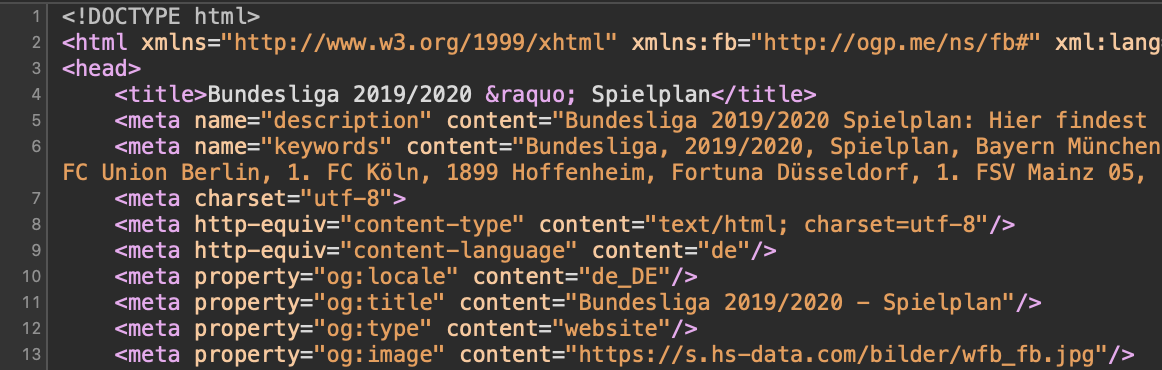

2. Öffne das Dokument wie im fünften Notebook gelernt, lies es ein und weise es der Variablen `source_code` zu.

3. Gehe nochmal zum [Spielplan](https://www.weltfussball.de/alle_spiele/bundesliga-2019-2020/) im Browser und öffne einige Spielberichte, indem Du auf die jeweiligen Spielergebnisse klickst. Schau Dir die Adresszeile an und analysiere, wie die Links aufgebaut sind sowie worin sie sich unterscheiden. Schau ebenfalls im Quelltext nach, wie die Links da aussehen (💡 Tipp: die Links im Quelltext sind abgekürzt).

4. Formuliere darauf aufbauend einen regulären Ausdruck, der sämtliche Links zu allen Spielberichten im Quelltext matcht. Füge ihn als string bei der Variablen `regex` ein. Ist der reguläre Ausdruck korrekt, sollte `matches` 306 Links beinhalten.

5. Erstelle eine Liste mit vollständigen Links zu allen Spielberichten und lasse sie Dir ausgeben. Probiere einige der Links aus.

Quelle: Übung modifiziert übernommen von Prof. Simon Meier-Vierackers Kurs [Reading Machines - Einführung in die Korpuslinguistik](https://padlet.com/simonmeiervieracker/readingmachines), der unter dem angegebenen Link frei zugänglich ist.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben

#hier Code zu Schritte 2 einfügen

#hier regulären Ausdruck (Schritt 4) einfügen
regex = r""
matches = re.findall(regex, source_code)

#hier Code zu Schritt 5 einfügen



***

#### Weitere Sonderzeichen

Zusätzlich zu den uns bereits bekannten Sonderzeichen gibt es noch folgende:

| **Zeichen** | **Sonderbedeutung** | **Beispiel** | **Bemerkungen** 
|:-:|:-|:-|:-|
| ```\n``` | matcht einen Zeilenumbruch |  - | -
| ```\t``` | matcht einen Tabstopp | - | -
| ```\b``` | matcht Wortgrenzen (whitespace oder nicht-alphanumerische Zeichen) | ```\b[a-zäöüß]{3}\b``` matcht ein kleingeschriebenes Wort mit drei Buchstaben und stellt eine elegantere Lösung für Übung 2.1 dar (s.o. bzw. im Lösungsnotebook) | `\B` matcht das Gegenteil, also ein Zeichen, das keine Wortgrenze ist
| ```^``` | matcht den Anfang eines strings | ```^[A-ZÄÖÜ]\w+\b``` matcht das erste Wort eines strings, sofern dieses mit einem Großbuchstaben beginnt | hat eine andere Bedeutung in eigenen Zeichenklassen (s.o.)
| ```$``` | matcht das Ende eines strings | ```te$``` matcht *te*, sofern diese Zeichen die letzten beiden eines strings sind | -
| ```\``` | "maskiert" (engl. *escapes*) Sonderzeichen, wenn diese literal interpretiert werden sollen | ```\.``` matcht ".", anstatt ein beliebiges Zeichen (Wildcard, s.o.) |  Maskierung ist innerhalb eigener Zeichenklassen nicht nötig (s.o.)

***

✏️ **Übung 4:** Lies das Märchen "Des Kaisers neue Kleider" von Hans Christian Andersen aus dem Ordner "3_Dateien" ein und weise es `fairytale` zu. Formuliere nun reguläre Ausdrücke für folgende Suchaufträge:

1. das erste Wort des Märchens
2. regelmäßige Verben in der 3. Person Singular/Plural im Präteritum (z.B. "lebte" oder "sagte"; es ist in Ordnung, wenn Du mit diesem regulären Ausdruck auch ein paar falsch positive (vgl. Wahrheitsmatrix im 5. Notebook) matches kriegst 🤫)
3. letzte Wörter von Sätzen, die mit einem Punkt enden (z.B. "einherzugehen", vgl. erster Satz des Märchens)
4. Wörter mit Doppel-a (z.B. "Saal")
5. das letzte Wort des Märchens

Da wir bei der ersten und letzten Aufgabe, nicht nach *allen* matches suchen, sondern nur an einem einzigen interessiert sind (es kann ja auch nur jeweils einen match geben), verwenden wir eine neue Funktion, nämlich `search`, auf die wir unten genauer eingehen. Dabei erhalten wir keine Liste zurück, sondern ein sog. *match-Objekt*, wobei wir auf den eigentlichen match wie im `print`-Statement bereits vorgegeben zugreifen können. Überhaupt sollte das `print`-Statement das Ergebnis aller fünf Suchaufträge schön formatiert ausgeben.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben

regex_1 = r""
regex_2 = r""
regex_3 = r""
regex_4 = r""
regex_5 = r""

first_word = re.search(regex_1, fairytale)
verbs = re.findall(regex_2, fairytale)
last_words = re.findall(regex_3, fairytale)
double_vowel = re.findall(regex_4, fairytale)
last_word = re.search(regex_5, fairytale)

#Hashtag entfernen, um Ergebnisse auszugeben
#print(first_word.group(), "\n\n", verbs, "\n\n", [word.strip(".") for word in last_words], "\n\n", double_vowel, "\n\n", last_word.group().strip("."))

***


✏️ **Übung 5:** Im vierten Notebook in Übung 2 haben wir gesehen, dass das Wort "Klima" viel häufiger im Koalitionsvertrag von 2021 als in demjenigen von 2018 vorkommt. Nun wollen wir herausfinden, in welcher Form das Wort verwendet wird. Neben dem alleinstehenden Auftreten von "Klima" (als sog. *Simplex*, da es aus nur einem Morphem besteht) ist "Klima" bzw. "klima" häufig Teil von zusammengesetzten Wörtern, also sog. *Komposita*, wie etwa in"Klimakrise" oder "klimapolitisch".  

Lies den Koalitionsvertrag von 2021 nochmal ein und weise ihn der Variablen `kv21` zu. Durchsuche ihn nun nach einem regulären Ausdruck, der sämtliche Komposita, in denen "Klima" bzw. "klima" vorkommt, matcht. Hänge alle Komposita der Liste `climate_compounds` an und lasse Dir abschließend die Liste ausgeben.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben

regex = r""

for match in re.findall(regex, kv21):
    pass
    


***

Damit kennen wir erstmal die wichtigsten Sonderzeichen.

Bisher haben wir bei unseren regulären Ausdrücken nur jeweils definiert, welches bzw. welche Zeichen wo und wie oft vorkommen müssen, damit ein match vorliegt. Wir konnten bei Aufgabe 4 in Übung 4 beispielsweise festlegen, dass zwischen beliebig vielen anderen Buchstaben zwei "a" aufeinanderfolgen müssen. Was aber, wenn wir nicht bloß an Doppel-a's, sondern generell an Doppelvokalen interessiert wären? Der reguläre Ausdruck `r"\w*[aeiou]{2}\w*"` ist dafür keine Lösung, da er auch "gemischte" Doppelvokale wie z.B. den Diphtong "ie" in "schief" matchen würde. Hier kommen sog. *Gruppen* ins Spiel:

### Gruppen

Gruppen machen es möglich verschiedene Alternativen für eine bestimmte Position im regulären Ausdruck zu definieren. Sie werden mit runden Klammern abgegrenzt und die Alternativen mit senkrechten Strich voneinander unterschieden. In der Tabelle unten folgt auch gleich die Auflösung, wie ein regulärer Ausdruck für Wörter mit Doppelvokalen ausschaut:

| **Zeichen** | **Sonderbedeutung** | **Beispiel** | **Bemerkungen** 
|:-:|:-|:-|:-|
| `(...)` | Gruppe | siehe Beispiel eine Zeile weiter unten | - 
| ```⎮``` | Alternative | `\w*(aa⎮ee⎮ii⎮oo⎮uu)\w*` oder `\w*(a{2}⎮e{2}⎮i{2}⎮o{2}⎮u{2})\w*`| -

***

✏️ **Übung 6:** Finde alle Substantive mit definitem Artikel (z.B. "der" oder "dem") in `text`, das der Einleitung des [ Wikipedia-Artikels zu regulären Ausdrücken](https://de.wikipedia.org/wiki/Regulärer_Ausdruck) entspricht (Stand: 26.10.2022). Der Artikel (des Substantivs) sollte jeweils mitgemacht werden.

⚠️ Achtung: Sobald wir eine Gruppe in unserem regulären Ausdruck verwenden, beschränkt sich die `findall`-Funktion darauf, denjenigen Teil des gesamten matches, der von der Gruppe abgedeckt wird, zu speichern. Bei mehreren Gruppen speichert `findall` sämtliche matches, die von Gruppen abgedeckt werden, separat in einem Tupel. Das ist eine durchaus praktische Eigenschaft, die wir unten produktiv einsetzen werden. Da wir hier aber am gesamten match interessiert sind (in unserem Fall Artikel + Substantiv) können wir zusätzlich den gesamten Ausdruck in runde Klammern setzen. Dadurch erhalten wir den gesamten match als Hauptgruppe sowie alle weiteren darin befindlichen Gruppen als Tupel von `findall` zurück. In den gegebenen `print`-Befehlen kannst Du dir erstens nur den gesamten match (erstes Element im Tupel) oder zweitens Hauptgruppe sowie alle anderen Gruppen ausgeben lassen.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben

text = """Ein regulärer Ausdruck (englisch regular expression, Abkürzung RegExp oder Regex) ist in der theoretischen Informatik eine Zeichenkette, die der Beschreibung von Mengen von Zeichenketten mit Hilfe bestimmter syntaktischer Regeln dient. Reguläre Ausdrücke finden vor allem in der Softwareentwicklung Verwendung. Neben Implementierungen in vielen Programmiersprachen verarbeiten auch viele Texteditoren reguläre Ausdrücke in der Funktion „Suchen und Ersetzen“. Ein einfacher Anwendungsfall von regulären Ausdrücken sind Wildcards.
Reguläre Ausdrücke können als Filterkriterien in der Textsuche verwendet werden, indem der Text mit dem Muster des regulären Ausdrucks abgeglichen wird. Dieser Vorgang wird auch Pattern Matching genannt. So ist es beispielsweise möglich, alle Wörter aus einer Wortliste herauszusuchen, die mit S beginnen und auf D enden, ohne die dazwischen liegenden Buchstaben oder deren Anzahl explizit vorgeben zu müssen.
Der Begriff des regulären Ausdrucks geht im Wesentlichen auf den Mathematiker Stephen Kleene zurück, der die ähnliche Bezeichnung reguläre Menge verwendete."""

regex = r"()"

matches = re.findall(regex, text)

#Hashtags entfernen, um Ergebnisse auszugeben
#nur den gesamten match (Hauptgruppe) ausgeben lassen
#print([match[0] for match in matches])
    
#den gesamten match (Hauptgruppe) und alle anderen Gruppen ausgeben lassen
#print([match for match in matches])

*** 

Einerseits können wir Gruppen in Kombination mit dem senkrechten Strich dazu einsetzen, verschiedene Alternativen für eine bestimmte Position im regulären Ausdruck zu definieren, also z.B. "er", "ie" etc. im Anschluss an "d", um verschiedene Varianten des definiten Artikels gleichzeitig abzudecken.

Andererseits bieten Gruppen den praktischen Vorteil, dass wir nicht nur einen Gesamtmatch zurückerhalten (sofern wir den gesamten regulären Ausdruck ebenfalls in eine runde Klammer setzen, siehe Übung 6), sondern auch beliebig viele Teilmatches. Alles, was in einem regulären Ausdruck von einer runden Klammer umrahmt wird, wird als Teilmatch in einem Tupel zurückgegeben, wobei die Reihenfolge im Tupel der Reihenfolge der öffnenden Klammern im regulären Ausdruck entspricht. 

Wir müssen innerhalb von Gruppen übrigens nicht unbedingt Alternativen definieren. In bestimmten Anwendungsfällen reicht uns eine Option, es ist uns aber wichtig, dass wir separat auf den Teil des Gesamtmatches zugreifen können, der von den entsprechenden runden Klammern umrahmt wird. Machen wir es in folgender Übung konkret:

***

✏️ **Übung 7 (fortgeschritten):** Gegeben sind kurze Beschreibungen von fünf Personen in `people`. In jeder Beschreibung findet sich der Vor- und Nachname, das Geburtsdatum sowie die E-Mailadresse der Person. Wir wollen daraus ein kleines Adressbuch in tabellarischer Form schaffen. Ziel ist es, die Daten wie im Screenshot gezeigt in die Datei "address_book.tsv" im Ordner "3_Dateien/Output" zu schreiben: 

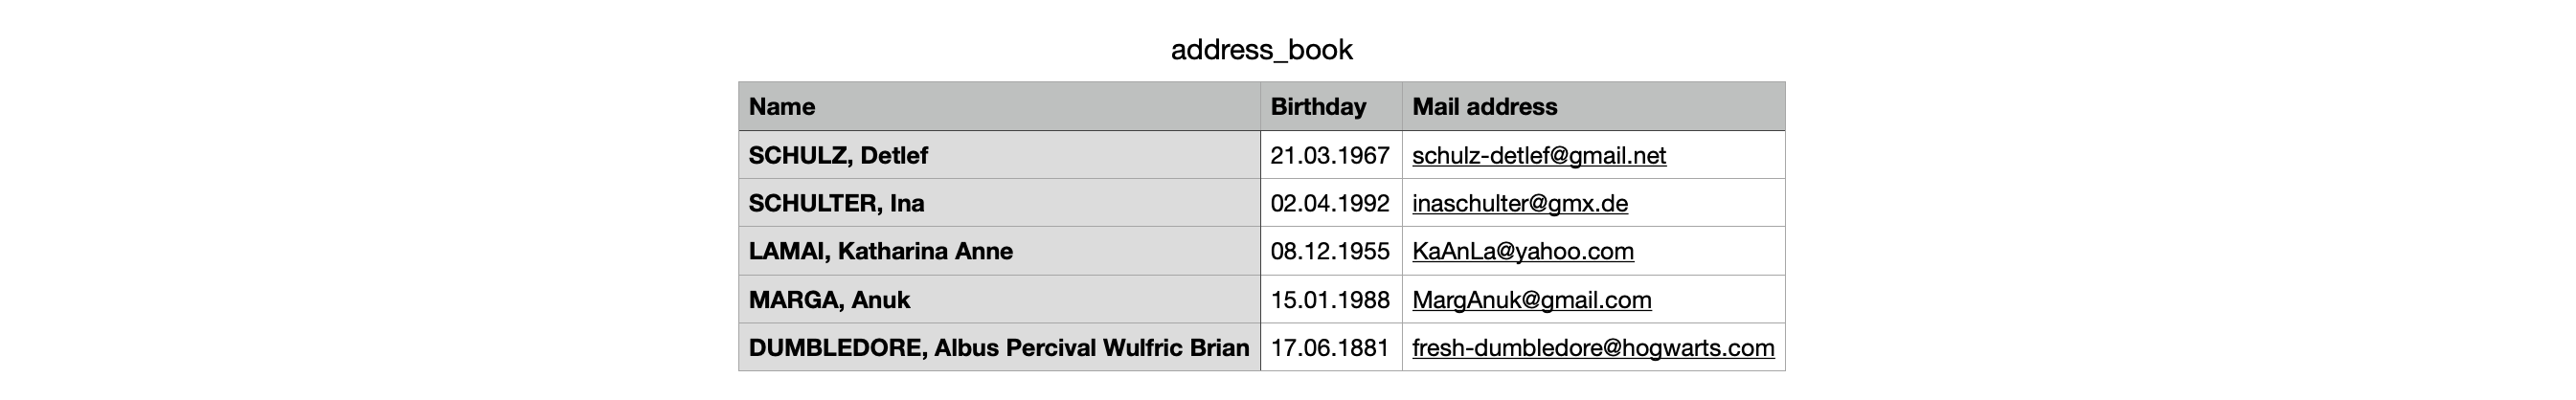

Zwischen den Namen und dem Geburtstag sowie dem Geburtstag und der E-Mailadresse soll also ein Tab stehen, da Dateien mit der Endung ".tsv" tabulatorsepariert sind (dem gleichen Prinzip wie kommaseparierte Dateien folgend, vgl. 5. Notebook).

Formuliere *einen* regulären Ausdruck, um fünf matches zu erhalten (einen pro Person), und nutze Gruppen, um die Elemente *Nachname*, *Vorname*, *Geburtstag* und *E-Mailadresse* als Teilmatch separat zu erhalten. Öffne und beschreibe anschließend die Datei "address_book.tsv", sodass jede Person in einer eigenen Zeile abgespeichert wird sowie jedes Element in einer eigenen Spalte.

💡 Tipp: `findall` findet stets den längstmöglichen match. Da die Wildcard alle beliebigen Zeichen *außer* einem Zeilenumbruch matcht, kannst Du sie getrost in Deinen regulären Ausdruck einbauen, z.B. für die erste Gruppe der Vornamen, etwa so `(.+)`. Indem Du danach eine Gruppe für den Nachnamen anhängst, kann die durch den Quantifikator `+` "ungebändigte" Wildcard nicht einfach die ganze Personenbeschreibung matchen (man spricht angesichts dieser Gier auch von *fressen*). Dies, da sie ja keinen Zeilenumbruch matchen kann und nach dem Zeilenumbruch nun mal nichts kommt, das von Deiner zweiten Gruppe sowie dem restlichen regulären Ausdruck gematcht werden könnte.

Quelle: Übung modifiziert übernommen von Prof. Simon Meier-Vierackers Kurs [Reading Machines - Einführung in die Korpuslinguistik](https://padlet.com/simonmeiervieracker/readingmachines), der unter dem angegebenen Link frei zugänglich ist.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben

people = """Detlef SCHULZ hat am 21.03.1967 Geburtstag, und das ist seine Emailadresse: schulz-detlef@gmail.net 
Ina SCHULTER wurde am 02.04.1992 geboren und ihre E-Mail-Adresse lautet: inaschulter@gmx.de
Katharina Anne LAMAI ist ein Dezemberkind, ihr Geburtstag ist der 08.12.1955 geboren und ihre E-Mail-Adresse lautet: KaAnLa@yahoo.com
Anuk MARGA ist am 15.01.1988 auf die Welt gekommen, ihre E-Mail-Adresse lautet: MargAnuk@gmail.com
Albus Percival Wulfric Brian DUMBLEDORE hat 17.06.1881 das Licht der Welt erblickt. Er hat sogar eine Emailadresse: fresh-dumbledore@hogwarts.com"""
 
regex = r""

matches = re.findall(regex, people)



*** 

Sehr gut!

Weiter unten folgen noch weitere Beispiele, in denen wir mit Teilmatches arbeiten, die aus Gruppen im regulären Ausdruck erwachsen.

Bevor wir uns dem `re`-Modul zuwenden, soll auf weitere Tutorials zu regulären Ausdrücken verwiesen werden, die zusätzliche Funktionalitäten thematisieren:

- [Umfangreiche und dennoch konzise Einführung von Dr. Daniel Fett, die weitere Features wie Lookaheads und Lookbehinds bespricht](https://danielfett.de/2006/03/20/regulaere-ausdruecke-tutorial/): 
- [Kurzes, auf die Korpuslinguistik zugeschnittenes Tutorial von Prof. Dr. Noah Bubenhofer von der Universität Zürich](https://www.bubenhofer.com/korpuslinguistik/kurs/index.php?id=regexp.html)
- [Gut gegliederte, umfangreiche Anleitung mit Übungen](http://regenechsen.de/wp/)

## Das ```re```-Modul

Nun schauen wir uns das Modul `re` genauer an. Grundsätzlich kann man unterscheiden zwischen Funktionen zum bloßen Matchen regulärer Ausdrücke sowie weiteren zum Matchen und Ersetzen bzw. Matchen und Splitten von strings basierend auf regulären Ausdrücken.

### Matchen

Zum Matchen haben wir oben bereits `re.findall` und `re.search` genutzt.

#### `re.findall` und `re.search`

Beide Funktionen nehmen als erstes Argument einen regulären Ausdruck und als zweites einen string, den sie nach dem regulären Ausdruck absuchen. Als weiteres, bisher noch unbekanntes Argument kann man ihnen, wie auch allen folgenden Funktionen, sog. Flags übergeben, die Eigenschaften des regulären Ausdrucks spezifizieren. Nützlich ist hier vor allem die `re.IGNORECASE`- bzw. abgekürzt `re.I`-Flag, die definiert, dass Groß- und Kleinschreibung nicht beachtet werden soll. Ein Beispiel dafür sehen wir weiter unten.

`re.findall` gibt alle matches (bzw. Teilmatches bei Gruppen, s.o.) auf einer Liste zurück. `re.search` gibt dagegen *ein* sog. match-Objekt zurück, bestehend aus dem ersten gefundenen match und dessen Position im abgesuchten string in Form von Indizes. Auf dieses match-Objekt können wir die etwas kryptisch benannten Methoden `group` und `span` anwenden, um separat auf match bzw. Indizes zuzugreifen. Der Unterschied wird in folgendem Code nochmal veranschaulicht:

In [ ]:
birth_notice = "Lena erblickte am 1. September 2022 genau 17 Sekunden nach Punkt 1 Uhr früh das Licht der Welt, sie wog 3403 Gramm und maß 51 cm."
regex = r"\d+"
all_matches = re.findall(regex, birth_notice)
first_match = re.search(regex, birth_notice)

print([match for match in all_matches])
print(first_match.group(), first_match.span()) 

Der erste match befindet sich also zwischen den Indizes 18 und 19 (der Startindex ist wie immer inklusiv und der Endindex exklusiv). 

***

✏️ **Übung 8:** Bei ```birth_notices``` handelt es nun um eine Liste mit mehreren Geburtsanzeigen. Deine Aufgabe ist es, die Geburtsdaten der Neugeboreren mithilfe eines regulären Ausdrucks sowie einer geeigneten Funktion des `re`-Moduls aus den Anzeigen zu extrahieren und einer Liste namens ```birth_dates``` anzuhängen. Lass dir abschließend `birth_dates` ausgeben.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben

birth_notices = ["Lena erblickte am 1. September 2022 die Welt.",
                 "Petra kam am 28. Februar 2022 zur Welt.",
                 "Yusuf strahlte uns am 14. Dezember 2022 mit glänzenden Äuglein an.", 
                 "Juans Leben begann am sonnigen 19. August 2022.",
                 "Robert bereichert seit dem 5. Mai 2022 unser Leben.",
                 "Mi beglückt uns seit dem 1. März 2022."]




***

Super!

#### `re.finditer` (fortgeschritten)

Angenommen, wir sind sowohl an allen matches in einem string als auch an deren jeweiligen Position interessiert, so können wir die `re.finditer`-Funktion verwenden:

In [ ]:
all_matches_with_indices = re.finditer(regex, birth_notice)

for match in all_matches_with_indices:
    print("Die Zahl", match.group(), "befindet sich zwischen Index", match.span()[0], "und", match.span()[1], "in der Geburtsanzeige.")

Wie bei `re.findall` landen alle matches in einer Art Liste (aber siehe Randnotiz unten). Die einzelnen Elemente sind wiederum match-Objekte, auf die wir wie bei `re.search` die Methoden `group` und `span` anwenden können, um auf den jeweiligen match bzw. die Indizes zuzugreifen.

Kurze Randnotiz, die Du auch gerne überlesen kannst: ```finditer``` gibt keine normale Liste zurück, sondern eine andere Art von iterierbarem Objekt, das nach einer einzigen Iteration leer (engl. *exhausted*) ist (überprüf es, indem Du eine neue Code-Zelle einfügst und nochmal versuchst über ```all_matches_with_indices``` zu iterieren). Das bietet effizienztechnische Vorteile (wenn's Dich interessiert: [hier](https://stackoverflow.com/questions/628903/performance-advantages-to-iterators) eine Diskussion zum Thema), ist für gewöhnliche Programmierer:innen aber irritierend. 🙈

#### `re.match` und `re.fullmatch`

Daneben gibt es noch die Funktionen `re.match` und `re.fullmatch`. Erstere überprüft bei einem string, ob dessen Anfang den regulären Ausdruck matcht (wodurch `^` überflüssig wird, s.o.) und letztere, ob der gesamte string den regulären Ausdruck matcht (wodurch `^` und `$` überflüssig werden). 

Der folgende, recht "dreiste" Code, der so ähnlich im Pizzabot integriert ist, endet nur, wenn Du einer Pizza mit "Ja" zustimmst. Schau, was passiert, wenn Du z.B. mit "Ja, wobei nein doch nicht" antwortest.

In [ ]:
prompt = "Willst Du eine Pizza?"
yes_regex, no_regex = r"Ja", r"Nein"
reaction_to_invalid_input = "\nIch akzeptiere nur ein 'Ja'.\n"
    
while True: 

    answer = input(prompt)

    if re.match(yes_regex, answer):
        print("Das ist die richtige Entscheidung!")
        break
    else:
        print(reaction_to_invalid_input)

Je nach Anwendungsfall macht es Sinn, etwas flexibler nur den Anfang eines strings zu matchen (`re.match`), oder strikt den kompletten string (`re.fullmatch`). Im Pizzabot wird `re.fullmatch` eingesetzt, um z.B. den, wenn auch wenig wahrscheinlichen, Input "Ja, wobei nein doch nicht" korrekt zu "handeln".

💡 In diesem Code sehen wir außerdem ein Verhalten Pythons, dem wir zwar schon einmal *en passant* im letzten Notebook begegnet sind, das wir aber noch nicht explizit besprochen haben: Wenn wir uns die bedingte Anweisung `if re.match(regex, text)` bzw. `if re.fullmatch(regex, text)` (vgl. auch Abschnitt zu Miss Sara Sampson im letzten Notebook) angucken, könnte der Eindruck entstehen, dass diese Funktionen die Boolschen Werte `True` oder `False` zurückgeben, je nach dem ob ein match vorliegt oder nicht. Tatsächlich geben sie aber ein gewöhnliches match-Objekt zurück, wenn sie einen match finden, ansonsten `None`, also *kein* Objekt. In der bedingten Anweisung oben machen wir uns den Umstand zunutze, dass `if object == None` (auf das es ja hinausläuft) für Python immer `False` ergibt und alles andere (also, wenn das Objekt *nicht* `None` ist) immer `True` ergibt. Dieses Verhalten gilt natürlich nicht nur im Zusammenhang mit regulären Ausdrücken. Wir können es produktiv einsetzen, wann immer es Sinn macht, den Ablauf des Codes von der Existenz eines Objekts abhängig zu machen (im Code des Pizzabots kommt es übrigens auch vor). 

Damit kennen wir alle wesentlichen Funktionen zum Matchen regulärer Ausdrücke. 

### Matchen und Ersetzen: `re.sub`

Aufbauend auf den Funktionen zum Matchen regulärer Ausdrücke, bietet das `re`-Modul auch die praktische Funktion `re.sub`, die alle matches des regulären Ausdrucks (`regex`) mit dem als zweiten Argument übergebenen string `replacement` im als drittes Argument übergegeben string (unten: `birth_dates`) ersetzt. Im folgenden Code nutzen wir `re.sub`, um Geburtsdaten zu schwärzen.

In [ ]:
birth_dates = "Ich bin am 09.08.1992 geboren, meine Schwester am 3.4.95 und unser Bruder am 9.10.1998"
regex = r"\d{1,2}\.\d{1,2}\.(19)?\d{2}"
replacement = "◾◾.◾◾.◾◾◾◾" 
blackened = re.sub(regex, replacement, birth_dates)
print(blackened)

Klappt doch super!

`replacement` kann übrigens auch ein regulärer Ausdruck sein, in dem wir mithilfe von Gruppen separierte Teilmatches des Ausdrucks `regex` referenzieren. Wie oben gelernt, speichern viele Funktionen des `re`-Moduls Teilmatches als Tupel ab, so auch `re.sub`. Innerhalb eines regulären Ausdrucks für `replacement` können wir den Inhalt der einzelnen Teilmatches einbauen. Der erste Teilmatch wird mit der Rückreferenz `\1` eingebaut, der zweite mit `\2`, etc. Die Reihenfolge der Teilmatches enspricht wie gesagt der Reihenfolge der öffnenden Klammern im regulären Ausdruck `regex`. 

Machen wir es konkret und formatieren die Preisangaben in `prices` einheitlich um. Hier kommt außerdem die Flag `re.I` zum Einsatz, d.h. Groß- und Kleinschreibung werden beim Matchen ignoriert:

In [ ]:
prices = "Der Apfel kostet 0,99 EUR, die Banane 1,49 €, das Brot 2,49 Euro und die Kaugummipackung 1 Euro."
regex = r"(\d+,?\d{0,2}) (euro?|€)"
replacement = r"EUR \1"
prices_standardized = re.sub(regex, replacement, prices, flags=re.I) #mit flag
print(prices_standardized)

In `regex` matchen wir mit der ersten Gruppe den Betrag und bauen diesen mittels der Rückreferenz `\1` in `replacement` ein. Konkret heißt das: Sobald der gesamte reguläre Ausdruck einen match in `prices` findet, wird derjenige Teil des matches, der von der ersten Gruppe gemacht wird, in genau der gleichen Form in der Ersetzung eingebaut. Die zweite Gruppe hingegen dient nur dem Definieren von Alternativen. Dieser Teilmatch wird nicht in `replacement` eingebaut. 

***

✏️ **Übung 9:** Gegeben sind in `people` nochmal die Personenbeschreibungen aus Übung 7 sowie die Musterlösung für den regulären Ausdruck in `regex`. `regex` beinhaltet Gruppen, auf deren Teilmatches wir zurückgreifen können. Formuliere unter Zuhilfenahme von Rückreferenzen einen regulären Ausdruck für `replacement`, um anschließend `people` mithilfe von `re.sub` in dasselbe Format wie in Übung 7 zu bringen:

"Nachname, Vorname \t Geburtsdatum \t E-Mailadresse" 

Es reicht diesmal, wenn Du das Dir das Ergebnis einfach ausgeben lässt.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben

people = """Detlef SCHULZ hat am 21.03.1967 Geburtstag, und das ist seine Emailadresse: schulz-detlef@gmail.net 
Ina SCHULTER wurde am 02.04.1992 geboren und ihre E-Mail-Adresse lautet: inaschulter@gmx.de
Katharina Anne LAMAI ist ein Dezemberkind, ihr Geburtstag ist der 08.12.1955 geboren und ihre E-Mail-Adresse lautet: KaAnLa@yahoo.com
Anuk MARGA ist am 15.01.1988 auf die Welt gekommen, ihre E-Mail-Adresse lautet: MargAnuk@gmail.com
Albus Percival Wulfric Brian DUMBLEDORE hat 17.06.1881 das Licht der Welt erblickt. Er hat sogar eine Emailadresse: fresh-dumbledore@hogwarts.com"""

regex = r"(.+) ([A-Z]+) .+ (\d{2}\.\d{2}\.\d{4}) .+ (\S+@\S+)"
replacement = r""



Anstatt eines strings, ob nun ein normaler oder ein regulärer Ausdruck, kann an Stelle von `replacement` übrigens auch eine Funktion stehen. 

Der Funktion wird iterativ jedes einzelne match-Objekt übergeben. Innerhalb der Funktion wird mithilfe der `group`-Methode auf Teilmatches zugegriffen. Die `group`-Methode nimmt nämlich optional einen Parameter in Klammern, z.B. eine 1, wenn wir den ersten Teilmatch referenzieren wollen oder eine 3 für den dritten, etc. (in den bisherigen Anwendungsbeispielen von `group` war die Klammer stets leer, da es gar keine Teilmatches gab). Am Ende der Funktion steht wie immer ein `return`-Statement (siehe viertes Notebook). Das, was die Funktion zurückgibt, ersetzt den match im abgesuchten string. 

Die Verwendung einer Funktion für die Ersetzung macht immer dann Sinn, wenn bloßes Rearrangieren der Teilmatches mithilfe von Rückreferenzen nicht ausreicht, sondern die einzelnen Teilmatches zusätzlich modifiziert werden müssen, wie in der folgenden Übung.

***

✏️ **Übung 10:** `birth_dates` von oben ist nun etwas länger und beinhält mehr Geburtsdaten. Ziel ist es, sämtliche Geburtsdaten in das Datumsformat nach [ISO 8601](https://de.wikipedia.org/wiki/Datumsformat#ISO_8601_und_EN_28601), also YYYY/MM/DD, zu bringen.

1. Wenn nötig, passe `regex` an, damit auch alle neuen Geburtsdaten gematcht werden.
2. Setze Klammern in `regex`, um relevante Teile eines matches zu gruppieren.
3. Passe die Funktion `to_ISO_format` an, damit jedes einzelne match-Objekt entsprechend IS0 8601 umstrukturiert wird. Hierzu einige Bemerkungen und Tipps:
    - Bei zweistelligen Jahreszahlen unter und gleich 22 kannst Du davon ausgehen, dass sie sich auf das 21. Jahrhundert beziehen, ansonsten auf das 20. Jahrhundert.
    - Verwende f-strings zur Formatierung der Teilmatches (vgl. fünftes Notebook).
    - Der Funktionsaufruf innerhalb von `re.sub(...)` ist korrekt, so wie er gegeben ist (es fehlen also keine Klammern!).

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben

birth_dates = """Ich bin am 09.08.1992 geboren, meine Schwester am 3.4.95 und unser Bruder am 9.10.1998. 
Unsere Mutter ist am 23.10.1967 geboren und unser Vater am 14.1.68. 
Der letzte Familienzuwachs ist die Tochter meines Bruders, die am 1.1.2022 geboren wurde."""

regex = r"\d{1,2}\.\d{1,2}\.(19)?\d{2}"

def to_ISO_format(match_object):
    pass
     
iso_dates = re.sub(regex, to_ISO_format, birth_dates)
print(iso_dates)

***

Toll! 

Soviel zur `re.sub`-Funktion.

### Matchen und Splitten: `re.split`

Widmen wir uns abschließend kurz der Funktion `re.split`, die dem Splitten von strings basierend auf einem regulären Ausdruck dient. Im Gegensatz zur `split`-Methode für strings können wir also nicht bloß ein Zeichen (bzw. eine Zeichenkette) definieren, bei welchem der string jeweils unterteilt wird, sondern ein komplexeres Muster, z.B. mehrere Zeichen, bei denen gesplittet werden soll:

In [ ]:
text = "Das ist ein Satz. Aber ist das ein Satz? Das hingegen ist definitiv ein Satz: Das ist ein Satz!"
regex = r"[.?!:]"
sentences = re.split(regex, text)
print([sentence for sentence in sentences])

`re.split` eignet sich also hervorragend zum Splitten eines strings nicht nur in Aussagesätze, sondern ebenfalls in Frage- und Exklamativsätze (mit "!"). Alles, was nach dem letzten match im zu splittenden string folgt, landet übrigens in einem eigenen Element auf der Liste, kurioserweise auch, wenn kein Zeichen mehr nach dem letzten match folgt (wie im Code oben, in dem ein leeres Element die Liste beendet).

☝️ Eine letzte Bemerkung zum `re`-Modul: Die oben verwendeten Funktionen begegnen einem in fremdem Code oft auch in Form von Methoden, z.B. in folgender Form: `regex.split(string)`. Dieses Statement ist gleichbedeutend mit `re.split(regex, string)`. Aber beachte: um eine Methode auf einen regulären Ausdruck anwenden zu können, muss dieser erst mithilfe der Funktion `re.compile` in ein kompiliertes *regular expression object* umgewandelt werden. Nur auf ein kompiliertes Objekt können dann `re`-Methoden angewandt werden. Die Methoden bieten einige Finetuning-Parameter, die wir bei den Funktionen nicht nutzen können. In aller Regel sind die Funktionen aber praktischer, da der Kompilierschritt entfällt. Dennoch ist es gut, beide Herangehensweisen zu kennen, um nicht von einer abweichenden Syntax (Methode statt Funktion) verwirrt zu werden.

Wenden wir uns nun dem Anwendungsfall für dieses Notebook zu.

***

##  🔧 Anwendungsfall: Der Pizzabot 🍕🤖

Der Anwendungsfall besteht wie erwähnt aus zwei Teilaufgaben. In der RegEx-bezogenen Aufgabe baust Du bereits existierende, aber noch sehr primitive reguläre Ausdrücke aus, um den Pizzabot flexibler und kund:innenfreundlicher werden zu lassen. In der Dokumentationsaufgabe schaust Du Dir den – abgesehen von den mangelhaften regulären Ausdrücken fertigen – Code zum Pizzabot genau an und dokumentierst ihn Schritt für Schritt.

### RegEx-bezogene Aufgabe

In der Datei "pizzabot.py" im Ordner "3_Dateien/Module" befinden sich unter "REGEX PATTERNS" sechs reguläre Ausdrücke: drei für die verschiedenen Pizzen, die der Bot im Angebot hat, zwei zur Normalisierung und Validierung von Antworten (Input) auf Ja-/Nein-Fragen und einen zur Validierung von what3words-Adressen, an die die Bestellung geliefert werden soll. 

Jeder dieser Ausdrücke dient dazu, den Input von User:innen zu validieren ("handelt es sich um eine Pizza im Angebot?", "handelt es sich um eine gültige Antwort auf die Ja-/Nein-Frage?", "handelt es sich um eine gültige Lieferadresse?"). Die regulären Ausdrücke für die Pizzen und diejenige für "Ja" bzw. "Nein" haben zusätzlich die Aufgabe, den Input zu normalisieren. Will heißen: die Bestellung einer "Margerita" (mit Rechtschreibfehler) soll der dem Bot verständlichen Kategorie "Margherita" zugeordnet werden, ebenso wie ein "jap" zu "yes" im Code werden soll, wobei "yes" dann den weiteren Codeablauf steuert (`if answer == "yes"`, siehe Code in "pizza_functions.py").

Erweitere nun die befindlichen regulären Ausdrücke derart, dass der Pizzabot 

1) für die drei Pizzen jeweils mindestens folgende Alternativschreibweisen erkennt:

    - margherita: margerita, margarita, margarita, mergerita, margarita
    - prosciutto: proschutto, schinken, procciuto, prosciuto, proschuto
    - vegetariana: vegetarisch, vegi, vegetariano, vegetaria, vegetario

2) bei der Normalisierung und Validierung des Inputs auf Ja-/Nein-Fragen mindestens mit folgendem alternativen Input umgehen kann:

    - ja: jo, jup, jop, jap, jaa, ja klar, klaro, mmhm, mhm, yes, si, oui, ja bitte, yes please, ja danke, yas, yeah
    - nein: ne, nee, nö, nein danke, niemals, bitte nicht, no, never, ne danke, nö danke, nee danke, nope, nene, no thanks, no, niet

3) bei der Validierung der [what3words](https://w3w.co/)-Adressen sämtlichen Input bestehend aus drei Wörtern des deutschen Alphabets, konkateniert durch je einen Punkt akzeptiert.

Groß- und Kleinschreibung musst Du nicht beachten, da `re.fullmatch` in "pizza_functions.py" jeweils die `re.I`-Flag (s.o.) übergeben wird. Versuche, möglichst kurze reguläre Ausdrücke zu formulieren.

Zum Überprüfen, ob der Pizzabot durch Deine angepassten regulären Ausdrücke mit alternativem Input umgehen kann, kannst folgende Zelle ausführen:

In [ ]:
import sys
sys.path.append("../3_Dateien/Module")
from importlib import reload 

"""falls der Pizzabot noch nicht importiert wurde (d.h. der Name "pizzabot" ist noch keine sog. lokale Variable, 
was wir über locals() überprüfen können), importieren wir ihn wie gewöhnlich"""
if "pizzabot" not in locals():
    import pizzabot
#falls er schon einmal importiert wurde (sich also unter den lokalen Namen befindet), laden wir ihn erneut mithilfe von reload, um neueste Änderungen ausprobieren zu können, ohne den Kernel neuzustarten
else:
    reload(pizzabot)

pizzabot.order_pizza()

Die Funktion `reload` sorgt dafür, dass jeweils die neuste gespeicherte Version des Moduls `pizzabot` geladen wird. Standardmäßig geschieht dies aus Arbeitsspeichergründen erst nach einem Neustart des Kernels. 

### Dokumentationsaufgabe

Öffne die Datei "pizzabot.py" in Sublime Text (vgl. viertes Notebook) und versuche Schritt für Schritt nachzuvollziehen, was in der darin befindlichen Funktion ```order_pizza``` geschieht. Unter anderem werden darin die Funktionen ```choose_pizza```, ```remove_ingredient```, ```add_ingredient```, ```request_address``` und ```yn_validator``` aus dem Modul ```pizza_functions``` importiert und aufgerufen. Öffne parallel auch diese Datei ("pizza_function.py") und versuche zu verstehen, was in den einzelnen Funktionen passiert und wie sie mit `order_pizza` interagieren.

Konkret sollst Du folgendes tun:

1) Füge möglichst vor jeder Code-Zeile einen Kommentar ein, in welchem Du dokumentierst, was in der folgenden Zeile passiert (vgl. erstes Notebook zu Kommentaren).
2) Ergänze alle Funktionen um docstrings, die sich anschließend über das ```__doc__```-Attribut abrufen lassen (vgl. viertes Notebook zu Modulen).

Tipp 💡: In dieser Aufgabe lohnt es sich wirklich, ```print```-Befehle in den Code einzubauen, um etwa Zwischenresultate zurückzukriegen oder, um zu verstehen, wann eine bedingte Anweisung "greift". Auch hier gilt: wann immer Du den Code veränderst und ihn erneut ausprobieren willst, musst Du das betreffende Modul speichern und den Bot mithilfe von `reload` erneut in JupyterLab laden (s.o.). 

Nach getaner Arbeit kannst Du hier die docstrings sämtlicher Funktionen inspizieren:

In [ ]:
#reload bei Änderungen, gleiche Logik wie oben
if "pizza_functions" not in locals():
    import pizzabot, pizza_functions
else:
    reload(pizzabot)
    reload(pizza_functions)

print(pizzabot.order_pizza.__doc__, "\n")
print(pizza_functions.yn_validator.__doc__, "\n")
print(pizza_functions.choose_pizza.__doc__, "\n")
print(pizza_functions.remove_ingredient.__doc__, "\n")
print(pizza_functions.add_ingredient.__doc__, "\n")
print(pizza_functions.request_address.__doc__, "\n")

***



Das war's. Sehr gute Arbeit!

## Cheat Sheet

Unten findest Du noch eine Zusammenstellung aller hier vorgestellten Sonderzeichen in einer Tabelle.

| **Zeichen** | **Sonderbedeutung** | **Beispiel** | **Bemerkungen** 
|:-:|:-|:-|:-:|
| ```.``` | matcht ein beliebiges Zeichen | ```H.nd``` matcht z.B. *Hund*, *Hand* | einzige Ausnahme: `.` matcht keinen Zeilenumbruch
| ```*``` | das davor stehende Zeichen darf 0 bis *n* mal vorkommen | ```Hund.*``` matcht z.B. *Hund*, *Hunde*, *Hundehütte* | –
| ```+``` | das davor stehende Zeichen darf 1 bis *n* mal vorkommen | ```Hund.+``` matcht z.B. *Hunde*, *Hundehütte* | –
| ```?``` | das davor stehende Zeichen darf 0 bis 1 mal vorkommen | ```Hund.?``` matcht z.B. *Hund*, *Hunde*, *Hunds* | –
| ```{n}``` | das davor stehende Zeichen darf genau *n* mal vorkommen | ```Hu{7}nd``` matcht *Huuuuuuund* | –
| ```{n,m}``` | das davor stehende Zeichen darf min. *n* und max. *m* mal vorkommen | ```Hu{2,3}nd``` matcht *Huund*, *Huuund* | bleiben *n* / *m* leer, werden nach unten / oben beliebig viele Zeichen gematcht
| ```\w``` | matcht ein beliebiges alphanumerisches [ASCII](https://de.wikipedia.org/wiki/American_Standard_Code_for_Information_Interchange)-Zeichen | ```N\w*t``` matcht z.B. *Nacht*, *N8t*, *Nimmersatt* | Fertige Zeichenklasse; ASCII beinhält A-Z, a-z, 0-9, Unterstrich, aber nicht die dt. Buchstaben ä, ö, ü, ß!
| ```\d``` | matcht eine Zahl | ```\d{4} \d{4} \d{4} \d{4}``` matcht Kreditkartennummern im gängigen Schreibformat | Fertige Zeichenklasse
| ```\s``` | matcht ein whitespace-Zeichen (Leerschlag, Tabstopp, Zeilenumbruch) | ```\s{2,}``` matcht alle Vorkommen von doppelten Leerschlägen (und anderem whitespace) | Fertige Zeichenklasse
| ```\W```,```\D```,```\S``` | matcht jeweils das Gegenteil von ```\w```, ```\d``` bzw.```\s``` | ```\W+``` matcht z.B. *äöüñßå!!* | Fertige Zeichenklassen
| ```[...]``` | eigene Zeichenklasse | ```[\wÄäÖöÜüß]*``` matcht beliebig viele Buchstaben des dt. Alphabets | erlaubte Zeichen (inkl. fertiger Zeichenklassen) werden schlicht aneinandergereiht; Sonderzeichen (mit Ausnahme fertiger Klassen) verlieren ihre Sonderbedeutung innerhalb von Klassen (`.` steht für ".", also keine Wildcard)
| ```[a-z]``` | eigene Zeichenklasse mit Range | ```[1-3]{2}``` matcht *11*, *12*, *13*, *21*, *22*, *23*, *31*, *32*, *33* | Range mittels Bindestrich funktioniert bei Groß-/Kleinbuchstaben und Zahlen
| ```[^...]``` | matcht ein Zeichen, das sich nicht in der Klasse befindet | ```[^aeiouAEIOU]``` matcht einen Konsonanten oder ein anderes nicht-alphabetisches Zeichen | ```^``` hat außerhalb von Klassen eine andere Sonderbedeutung (s.u.)
| ```\n``` | matcht einen Zeilenumbruch |  - | -
| ```\t``` | matcht einen Tabstopp | - | -
| ```\b``` | matcht Wortgrenzen (whitespace oder nicht-alphanumerische Zeichen) | ```\b[a-zäöüß]{3}\b``` matcht ein kleingeschriebenes Wort mit drei Buchstaben und stellt eine elegantere Lösung für Übung 2.1 dar (s.o. bzw. im Lösungsnotebook) | `\B` matcht das Gegenteil, also ein Zeichen, das keine Wortgrenze ist
| ```^``` | matcht den Anfang eines strings | ```^[A-ZÄÖÜ]\w+\b``` matcht das erste Wort eines strings, sofern dieses mit einem Großbuchstaben beginnt | hat eine andere Bedeutung in eigenen Zeichenklassen (s.o.)
| ```$``` | matcht das Ende eines strings | ```te$``` matcht *te*, sofern diese Zeichen die letzten beiden eines strings sind | -
| ```\``` | "maskiert" (engl. *escapes*) Sonderzeichen, wenn diese literal interpretiert werden sollen | ```\.``` matcht ".", anstatt ein beliebiges Zeichen (Wildcard, s.o.) |  Maskierung ist innerhalb eigener Zeichenklassen nicht nötig (s.o.)
| `(...)` | Gruppe | siehe Beispiel eine Zeile weiter unten | - 
| ```⎮``` | Alternative | `\w*(aa⎮ee⎮ii⎮oo⎮uu)\w*` oder `\w*(a{2}⎮e{2}⎮i{2}⎮o{2}⎮u{2})\w*` matcht ein Wort mit Doppelvokal | -
